In [4]:
from notebookTrain import *
model = CountCeptionModel()
model = model.load_from_checkpoint("C:/Users/gator/FullerLab/BrainStemSegmenter/lightning_logs/version_32/checkpoints/epoch=373-step=3740 copy.ckpt")
model.eval()
data_module = CountceptionDataModule("C:/Users/gator/OneDrive - University of Florida/10x images for quantification/Manual Counts/cropped")
data_module.setup("test")
loader = data_module.test_dataloader()

torch.Size([8, 3, 300, 300])
torch.Size([8, 1, 332, 332])
('6', '75', '8', '10', '11', '12', '13', '14')
torch.Size([8, 3, 300, 300])
torch.Size([8, 1, 332, 332])
('16', '18', '18', '19', '20', '27', '3', '4')


C:\Users\gator\AppData\Local\Temp\ipykernel_4300\4261702198.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axarr = plt.subplots(2,1)


torch.Size([5, 3, 300, 300])
torch.Size([5, 1, 332, 332])
('5', '6', '7', '8', '8')


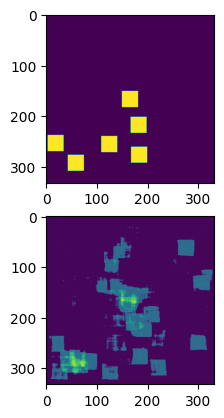

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x0000020C48726B80>
Traceback (most recent call last):
  File "c:\Users\gator\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\utils\data\dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "c:\Users\gator\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\utils\data\dataloader.py", line 1295, in _shutdown_workers
    if self._persistent_workers or self._workers_status[worker_id]:
AttributeError: '_MultiProcessingDataLoaderIter' object has no attribute '_workers_status'


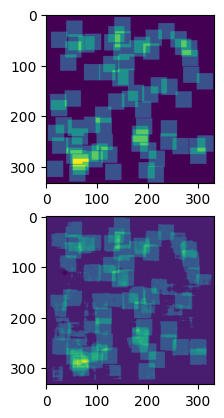

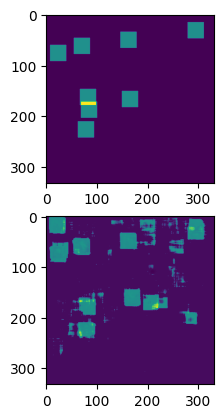

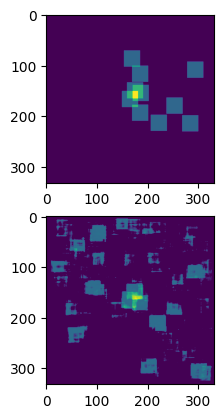

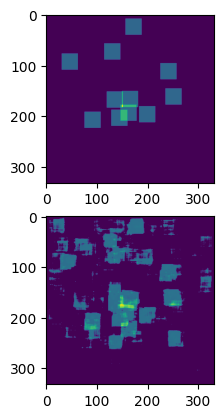

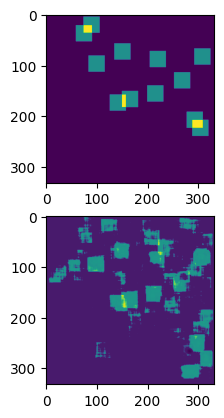

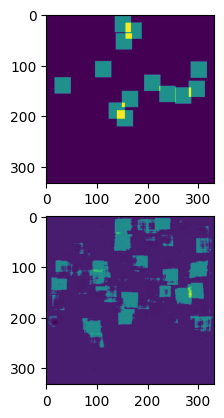

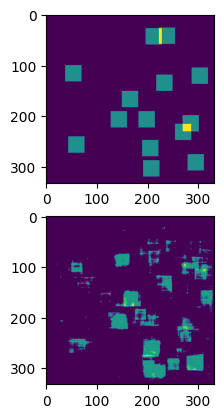

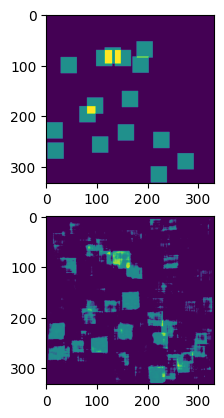

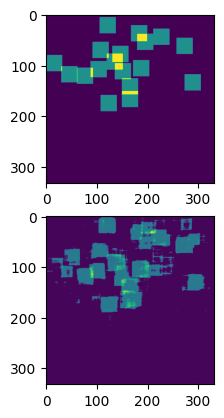

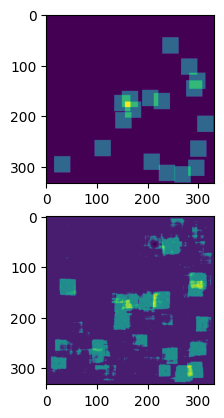

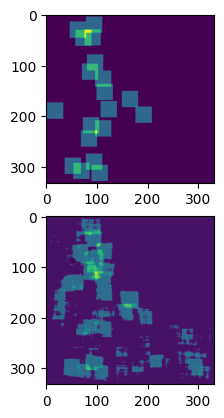

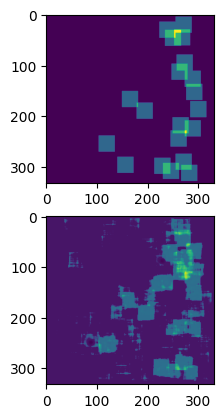

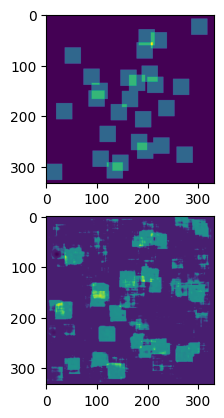

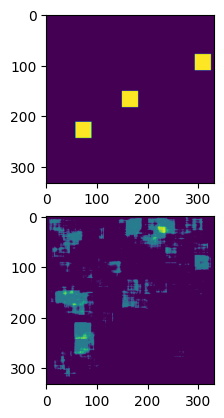

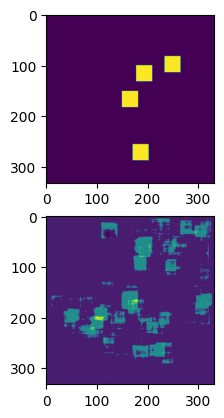

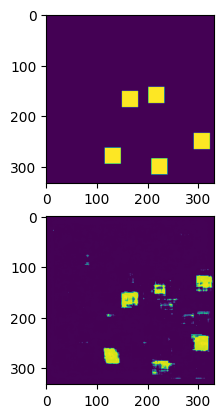

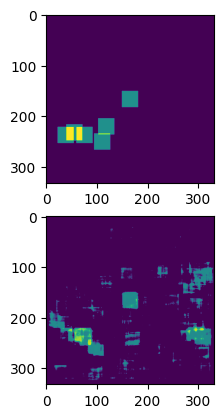

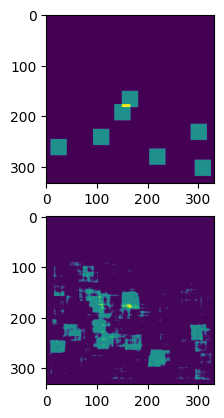

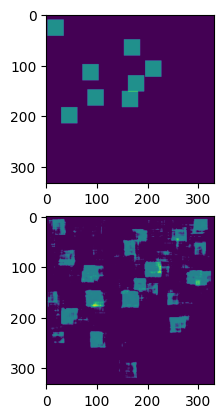

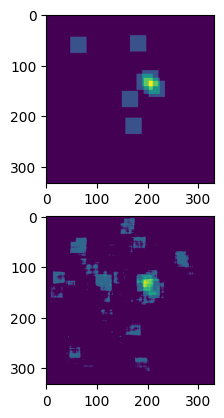

In [8]:
for batch in loader:
    images = batch[0]
    labels = batch[1]
    counts = batch[2]
    for image, label in list(zip(images, labels)):
        image = image.detach().permute(1,2,0)
        image_model = torch.stack([image])
        pred = model.forward(image_model)
        pred = pred[0].detach().permute(1,2,0)
        label = label.detach().permute(1,2,0)
        f, axarr = plt.subplots(3,1)
        axarr[0].imshow(label)
        axarr[1].imshow(pred)
        axarr[2].imshow(image)
        plt.show()
    print(images.shape)
    print(labels.shape)
    print(counts)